Data Analysis Exercises

**The columns of the dataframe:**

> Age: displays the age of the individual.

> Sex: displays the gender of the individual using the following format :
>> 1 = male

>> 0 = female

> Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
>> 1 = typical angina

>> 2 = atypical angina

>> 3 = non — anginal pain

>> 4 = asymptotic

> Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

> Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

> Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
>> If fasting blood sugar > 120mg/dl then : 1 (true)

>> else : 0 (false)

> Resting ECG : displays resting electrocardiographic results
>> 0 = normal

>> 1 = having ST-T wave abnormality

>> 2 = left ventricular hyperthrophy

> Max heart rate achieved : displays the max heart rate achieved by an individual.

> Exercise induced angina :
>> 1 = yes

>> 0 = no

> ST depression induced by exercise relative to rest: displays the value which is an integer or float.

> Peak exercise ST segment :
>> 1 = upsloping

>> 2 = flat

>> 3 = downsloping

> Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

> Thal : displays the thalassemia :
>> 3 = normal

>> 6 = fixed defect

>> 7 = reversible defect

> num : Displays whether the individual is suffering from heart disease or not :
>> 0 = absence

>>1, 2, 3, 4 = present.

## Imports

In [144]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

import the data directly from the website


In [145]:
# here the path of the file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

#define the name of each column in the dataset
names = ['age',       
      'sex',       
      'cp',        
      'trestbps',  
      'chol',      
      'fbs',       
      'restecg',   
      'thalach',
      'exang',     
      'oldpeak',   
      'slope',     
      'ca',         
      'thal',      
      'num']

# save the data as CSV file
df=pd.read_csv(url,names=names)
csv_data=df.to_csv() 

**Read the data from CSV file format using pandas library** 

> This link can help you: [pandas reading csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 

> you need to provide to this function: 

>> the file path: You will find it saved in the variable url in the above cell.

>> The names: You will find it saved in the variable names in the above cell.

# Assessing

**view the first 5 rows of the data to make sure that everything went well.**

In [146]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [147]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


**show the data type of each column and the number of non null values**

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**Check if there is any duplicates or missing values**

> Note that when you print the last 10 rows of the data there is a strange value in ca column represnted by "?".. Therefore, we concluded that the missing values in this dataframe represented by ? try to use .isnull().sum() to check for the missing values .. what do you notice ? 

In [149]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**We notice that there is no missing values!! even if we know that there was... This is because that .isnull() recognized only na nan values as missing**

**Therefore, you need first change the ? in the dataframe to be na or nan, then check for the missing values again**

> this links may help you: 
[replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)


In [150]:
df=df.replace('?',np.NAN)

In [151]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

**Change the datatype of sex into int instead of float**

In [152]:
df['sex'] = df['sex'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 33.3+ KB


# Basic Questions

**The num column represented the type of heart disease that faced the patients, What are the count of patients in each type of heart disease ?**

In [153]:
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

**convert this dataset into a binary data, the non-heart disease has a value 0, and any value other than 0, indicated that the patient has heart disease will be a class 1**

**all the next question will be on this dataset**

In [154]:
count=0
for vals in df['num']:
  if(df.at[count,'num']>1):
    df.at[count,'num']=1
  count=count+1
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


**draw the pie plot to the target variable in the binary dataset**

In [155]:
x_label=['non-heart disease','heart disease']
sumpie=[]
sumpie.append(df['num'].value_counts()[0])
sumpie.append(df['num'].value_counts()[1])

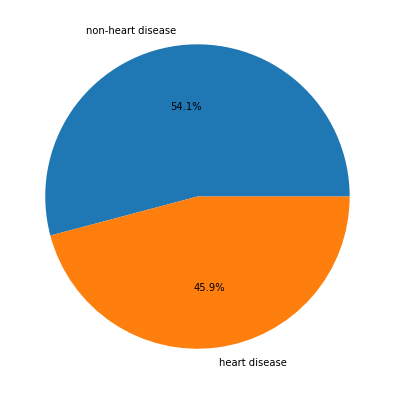

In [156]:
fig = plt.figure(figsize =(10, 7))
plt.pie(sumpie, labels = x_label,autopct='%1.1f%%')
plt.show()

**what is the number of non-heart disease and heart disease patient in each gender**

> Note: using [.gropby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) note that you will group by two columns not one 

> and .size()[this can be helpful](https://www.geeksforgeeks.org/plot-the-size-of-each-group-in-a-groupby-object-in-pandas/)]() to get the size

In [157]:
df.groupby(['sex','num']).size()

sex  num
0    0       72
     1       25
1    0       92
     1      114
dtype: int64

**Draw the histogram to the chol column for people with heart disease and without heart disease**

> Note that: specify the bins = 20

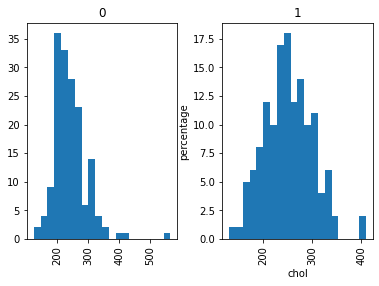

In [158]:
l=['no heart disease','with heart disease']
colors = ['red', 'tan']
histogram=df.hist(column='chol',bins=20,label=l,by='num')
plt.xlabel('chol')
plt.ylabel('percentage')
plt.show()


**Draw the heat map for the data**

> note determine the fig size to be (12,10)

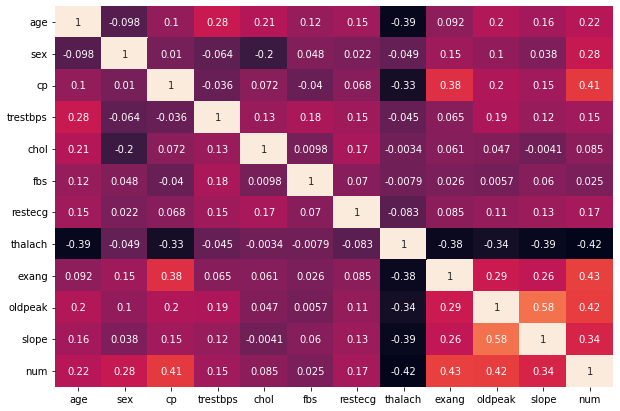

In [159]:
fig = plt.figure(figsize =(10, 7))
corr = df.corr()
sns.heatmap(corr, annot = True,cbar=False)

**Draw the box plot between the age and target (num)**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


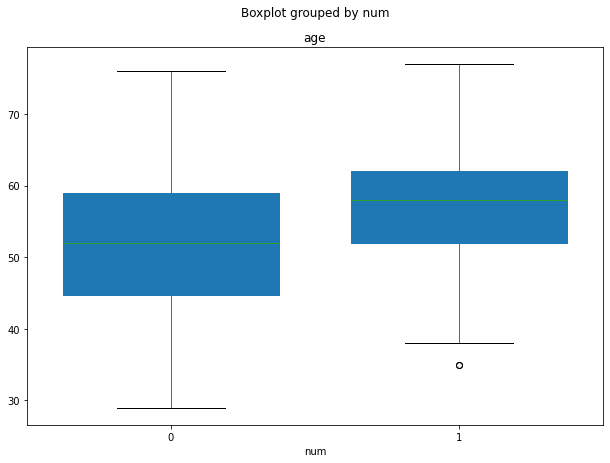

In [160]:
boxplot=df.boxplot(column='age',by='num',grid=False,patch_artist=True,figsize=(10,7),widths=0.75)

**Plot hist for each feature to get insight**

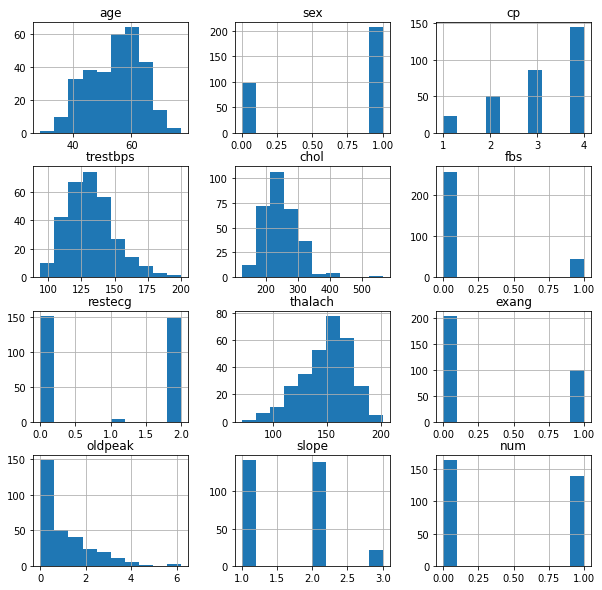

In [161]:
df.hist(figsize=(10,10))
plt.show()